## Research question: 


In contrast to the 1918 flu pandemic, Covid-19 can be considered as a “modern” disease, as its high transmission rate and low fatality rate make it incredibly hard to trace. Even though analyses have been drawn from several epidemiological perspectives, we find it particularly compelling to interpret the pandemic from a sociological standpoint. In particular, we want to analyze people’s reactions to the disease in reddit via the pushshift.io reddit API that allows us to perform extensive keyword searching and thus analyze keyword frequencies. Here are some of the initial research questions:
1. Does the keyword frequency of “covid” correlate with the number of covid cases on a daily basis?
The pushshift.io API allows us to search for multiple keywords that appear in the comment section. 
2. Does the aggregate of political keywords and the covid keyword, e.g. “Trump+covid”, correlate with the number of covid cases? Does the trend relate to particular political or social events? 
3. Do people feel sad, depressed, or hopeless about the pandemic? Are their emotions evident in the aggregate of emotional keywords and the covid keyword, e.g. “hopeless+covid”? 
The public policies have changed over time. People were not required to wear masks before May (?), but were mandated to do so since then. Does the keyword combination of mask and covid change over time, and in response to health guidance announcements? 
4. A safe, reliable vaccine is the only solution to this outbreak. Do people talk more about vaccinations and covid in recent days, i.e., “vaccine+covid”, as we are getting closer to producing a reliable vaccine? 
5. The death rate of Covid-19 is decreasing. Does the aggregate of death-related keywords and the covid keyword, e.g. “fatality+covid”, correlate with the death rate and the number of covid cases?



## Date cleaning:
1. Data cleaning during data collection for the Reddit API


We clean part of the data during the data collection process. First, we create a list of keywords that we want to search stored in the `KEYWORDS` variable and a `BASE_URL` that each of the keywords is added onto. Then, we make API calls to each of the urls, obtain the JSON string, and extract the number of times a word appears for a given day. After this procedure, we write the data to a csv file named by the keyword name (e.g. covid-testing.csv), where the first column is the date, and the second column is the keyword count in the format of “keyword_count”. This saves us time from renaming columns after importing the csv files and thus makes merging multiple datasets very easy.


2. Load csv files to the Notebook
- For reddit data
    - Merge dataframes
    - convert epoch-style int into datetime object
- For US cases
    - Sort with ascending time order
    - Delete unnecessary columns
- Merge two dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv files to Pandas DataFrames
covid = pd.read_csv("covid.csv")
covid_19 = pd.read_csv("covid-19.csv")
coronavirus = pd.read_csv("coronavirus.csv")
covid_economy = pd.read_csv("covid-economy.csv")
covid_job = pd.read_csv("covid-job.csv")
covid_jobs = pd.read_csv("covid-jobs.csv")
covid_cash = pd.read_csv("covid-cash.csv")
covid_money = pd.read_csv("covid-money.csv")
covid_blm = pd.read_csv("covid-blm.csv")
covid_biden = pd.read_csv("covid-biden.csv")
covid_trump = pd.read_csv("covid-trump.csv")
covid_election = pd.read_csv("covid-election.csv")
covid_china = pd.read_csv("covid-china.csv")
covid_mask = pd.read_csv("covid-mask.csv")
covid_masks = pd.read_csv("covid-masks.csv")
covid_shutdown = pd.read_csv("covid-shutdown.csv")
covid_tests = pd.read_csv("covid-tests.csv")
covid_tested = pd.read_csv("covid-tested.csv")
covid_testing = pd.read_csv("covid-testing.csv")
covid_test = pd.read_csv("covid-test.csv")
covid_sad = pd.read_csv("covid-sad.csv")
covid_depressed = pd.read_csv("covid-depressed.csv")
covid_depressing = pd.read_csv("covid-depressing.csv")
covid_hopeless = pd.read_csv("covid-hopeless.csv")
covid_bored = pd.read_csv("covid-bored.csv")
covid_death = pd.read_csv("covid-death.csv")
covid_fatality = pd.read_csv("covid-fatality.csv")
covid_vaccine = pd.read_csv("covid-vaccine.csv")
covid_vaccines = pd.read_csv("covid-vaccines.csv")

covid_breath = pd.read_csv("covid-breath.csv")
covid_chills = pd.read_csv("covid-chills.csv")
covid_cough = pd.read_csv("covid-cough.csv")
covid_fatigue = pd.read_csv("covid-fatigue.csv")
covid_fever = pd.read_csv("covid-fever.csv")
covid_headache = pd.read_csv("covid-headache.csv")
covid_shortness = pd.read_csv("covid-shortness.csv")
covid_smell = pd.read_csv("covid-smell.csv")
covid_sore = pd.read_csv("covid-sore.csv")
covid_taste = pd.read_csv("covid-taste.csv")

us_case = pd.read_csv("us_case.csv")

In [3]:
# Merge all DataFrames of reddit data into a single DataFrame
list = [covid_19, coronavirus, covid_economy, covid_job, covid_jobs, covid_cash, covid_money, covid_blm, covid_biden, covid_trump, covid_election, covid_china, covid_mask, covid_masks, covid_shutdown, covid_tests, covid_tested, covid_testing, covid_test, covid_sad, covid_depressed, covid_depressing, covid_hopeless, covid_bored, covid_death, covid_fatality, covid_vaccine, covid_vaccines, covid_breath, covid_chills, covid_cough, covid_fatigue, covid_fever, covid_headache, covid_shortness, covid_smell, covid_sore, covid_taste]
reddit = covid
for df in list:
    reddit = pd.merge(reddit, df, on='date')

In [4]:
# Convert epoch-style int to datetime object
import datetime
reddit.date = pd.to_datetime(reddit.date, unit='s')

In [5]:
# Delete unwanted columns in us_case dataframe
us_case = us_case[['date','totalTestResultsIncrease', 'deathIncrease', 'positiveIncrease']]

In [6]:
# Rename columns to uniform formats
us_case = us_case.rename(columns={'totalTestResultsIncrease':'total_test_increase','deathIncrease':'death_increase','positiveIncrease':'positive_increase' })

In [8]:
# Sort us_case by ascending time order
us_case = us_case.sort_index(ascending=False).reset_index(drop=True)

In [9]:
# Convert str to datetime object
us_case.date = pd.to_datetime(us_case.date)

In [10]:
# Merge two dataframes
result = pd.merge(reddit, us_case, on='date')

In [11]:
result

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_jobs_count,covid_cash_count,covid_money_count,covid_blm_count,...,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase
0,2020-03-03,6455,5381,20437,95,83,18,21,92,1,...,20,178,20,37,3,43,5,266,3,48
1,2020-03-04,6672,5561,20886,96,96,27,21,113,0,...,21,174,13,40,3,28,5,1119,2,139
2,2020-03-05,7434,6181,21201,116,91,17,24,113,0,...,15,165,14,38,5,32,6,641,4,107
3,2020-03-06,8186,6732,22031,117,118,30,42,158,0,...,24,221,24,57,2,48,6,873,6,112
4,2020-03-07,8077,6530,20570,116,92,23,15,120,0,...,12,198,13,51,7,46,8,919,1,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2020-09-28,24603,4497,4040,491,1130,405,153,1041,86,...,66,111,28,28,81,43,77,1010138,257,36524
210,2020-09-29,28549,5069,4296,573,1219,452,173,1093,131,...,98,126,46,28,104,45,87,812773,739,36947
211,2020-09-30,28285,4905,4092,905,1219,481,158,1019,128,...,158,227,81,67,253,83,241,790981,1061,44424
212,2020-10-01,27641,4802,4180,543,1272,476,177,1095,116,...,169,251,94,62,288,83,257,899458,847,45694


## Data descriptions:

Our data mainly comes from two resources: the pushshift.io API, and the Covid Tracking Project. The pushshift.io API is maintained by the /r/datasets mod team to help users better find comments and submissions on reddit. For the purpose of our analysis, we utilize the /comment endpoint which allows us to search for multiple keywords in reddit comments and returns the data in JSON format. We aggregate the search result by day for the last 300 days using attributes `after=300d`, `aggs=created_utc` and `frequency=day`. We don’t want any comment instances to be returned, so we set the return size to be 0. And lastly, we want the data to be returned in ascending, i.e., chronological order, and hence the attribute `sort=asc`. Each returned JSON object contains information about the day (in the format of timestamp) as well as the number of times the keyword(s) appear during the day. 

But JSON is not very handy to put into pandas DataFrames. Therefore, we wrote a Python script that loads and processes the JSON data in batches and wrote the data into csv files with two columns. (A detailed description of how the script works can be found in the data cleaning section.) The first column is the word frequency per day; the second is the date. This processing procedure returns very neat datasets. 

Similarly, the Covid Tracking Project is well maintained by a group of volunteers that compiles the covid-19 data on a daily basis. Their goal is to provide “the most complete data available about Covid-19 in the US.” Each row instance represents the Covid-19 data in a single day, and each column contains information about attributes such as daily cases and daily tests. 

## Data limitations: 

The data on reddit may be biased. Even though the U.S. has great Internet coverage, only a small percentage of people will actually comment on reddit. Our analyses represent their discussion trend of the covid-19, not the whole population. 

When searching for multiple keywords, we limited our search to “covid” and another keyword. We used “covid” instead of the more formal “coronavirus” because we assumed that people would use “covid” more frequently than “coronavirus”. “Coronavirus” is more likely to appear in news releases than in the discussion section. 

There may be multiple ways people use to phrase a term. For example, when talking about “covid testing”, people may phrase it as “get tested for covid”, or “the number of covid tests per day.” We are trying to think of as many terms as possible for a keyword that might be phrased differently. But we are not native speakers, and hence may not be able to think the way Americans do. 

There are two different endpoints for the reddit API: the comment endpoint, and the submission endpoint. We decided to concentrate on the comment endpoint since this is where most of the discussions occur, even though the two endpoints may yield slightly different results. 

## Exploratory data analysis:

We plot the frequencies of keywords "covid+test", "covid+tests", "covid+tested", "covid+testing". We observe that their trends are similar, so we take their sum to replace the original data for covid_test_count.

<AxesSubplot:xlabel='date'>

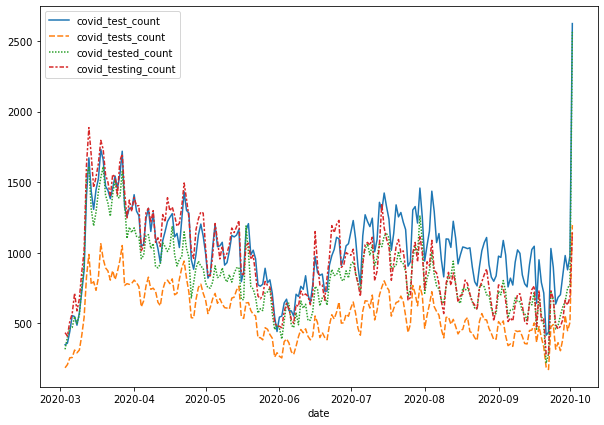

In [12]:
_, ax = plt.subplots(figsize=(10, 7))
new_result = result.set_index("date")
sns.lineplot(data=new_result[["covid_test_count", "covid_tests_count", "covid_tested_count", "covid_testing_count"]], ax=ax)

Similarly, we observe very close trends in covid_mask_count and covid_masks_count, so we takes their sum to replace the original data for covid_mask_count. 

<AxesSubplot:xlabel='date'>

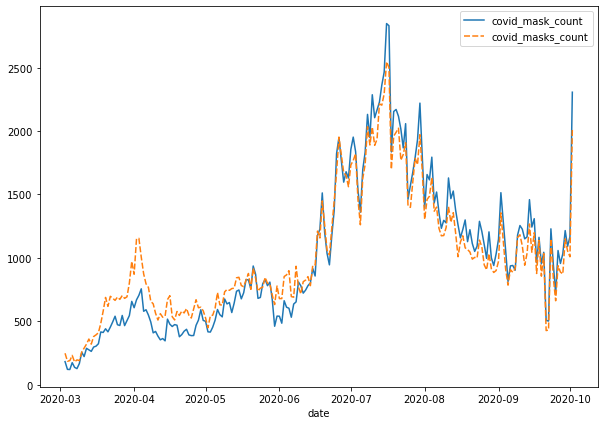

In [13]:
_, ax4 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_mask_count", "covid_masks_count"]], ax=ax4)

For keywords "covid+vaccine" and "covid+vaccines", we observe that the trend in covid_vaccine_count is more characteristic, so we take their sum to update covid_vaccine_count.

<AxesSubplot:xlabel='date'>

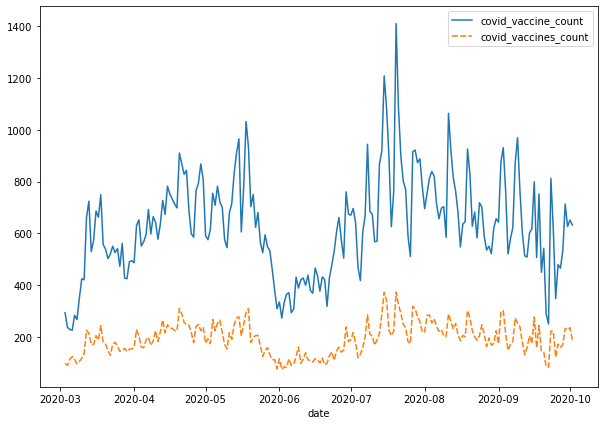

In [14]:
_, ax2 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_vaccine_count", "covid_vaccines_count"]], ax=ax2)

Similarly, covid_job_count is more representative, so we take their sum to replace covid_job_count.

<AxesSubplot:xlabel='date'>

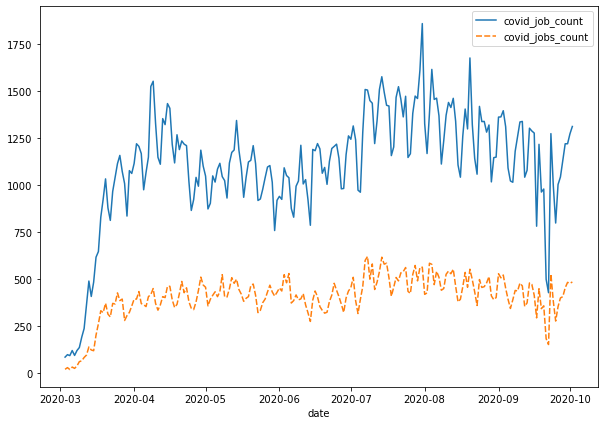

In [15]:
_, ax3 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_job_count", "covid_jobs_count"]], ax=ax3)

In [16]:
# Adjust columns of DataFrame
result['covid_vaccine_count'] += result['covid_vaccines_count']
result['covid_job_count'] += result['covid_jobs_count']
result['covid_mask_count'] += result['covid_masks_count']
result['covid_test_count'] += result['covid_tested_count'] + result['covid_testing_count'] + result['covid_tests_count']
result = result.drop(columns = ['covid_vaccines_count', 'covid_jobs_count', 'covid_masks_count', 'covid_tested_count', 'covid_testing_count', 'covid_tests_count'])

In [20]:
reddit = result.drop(columns=['total_test_increase','death_increase','positive_increase'])
reddit

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_cash_count,covid_money_count,covid_blm_count,covid_biden_count,...,covid_breath_count,covid_chills_count,covid_cough_count,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count
0,2020-03-03,6455,5381,20437,95,101,21,92,1,20,...,55,13,172,20,178,20,37,3,43,5
1,2020-03-04,6672,5561,20886,96,123,21,113,0,53,...,65,9,173,21,174,13,40,3,28,5
2,2020-03-05,7434,6181,21201,116,108,24,113,0,35,...,55,5,172,15,165,14,38,5,32,6
3,2020-03-06,8186,6732,22031,117,148,42,158,0,31,...,76,17,233,24,221,24,57,2,48,6
4,2020-03-07,8077,6530,20570,116,115,15,120,0,27,...,68,11,201,12,198,13,51,7,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2020-09-28,24603,4497,4040,491,1535,153,1041,86,364,...,91,7,119,66,111,28,28,81,43,77
210,2020-09-29,28549,5069,4296,573,1671,173,1093,131,438,...,111,10,137,98,126,46,28,104,45,87
211,2020-09-30,28285,4905,4092,905,1700,158,1019,128,1508,...,194,30,215,158,227,81,67,253,83,241
212,2020-10-01,27641,4802,4180,543,1748,177,1095,116,482,...,164,38,224,169,251,94,62,288,83,257


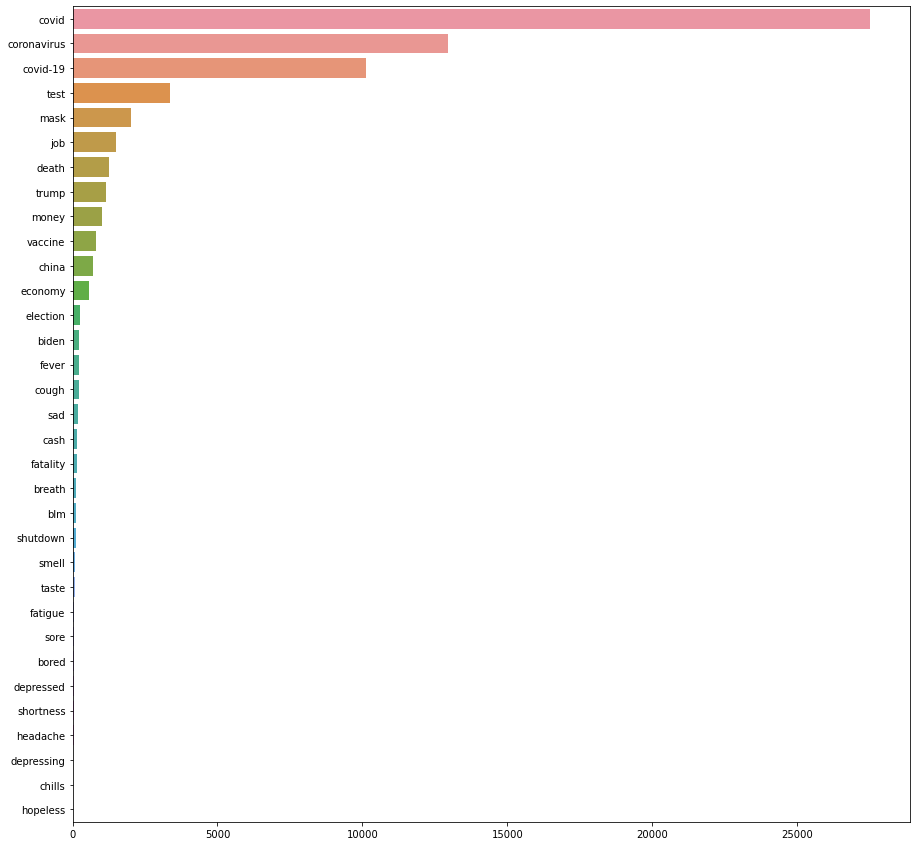

In [31]:
mean_reddit = reddit.iloc[:, 1:].mean().sort_values(ascending=False)
_, ax5 = plt.subplots(figsize=(15, 15))
mean_barplot = sns.barplot(y=mean_reddit.index, x=mean_reddit, orient='h', ax=ax5)
labels = mean_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], mean_reddit.index.tolist()))

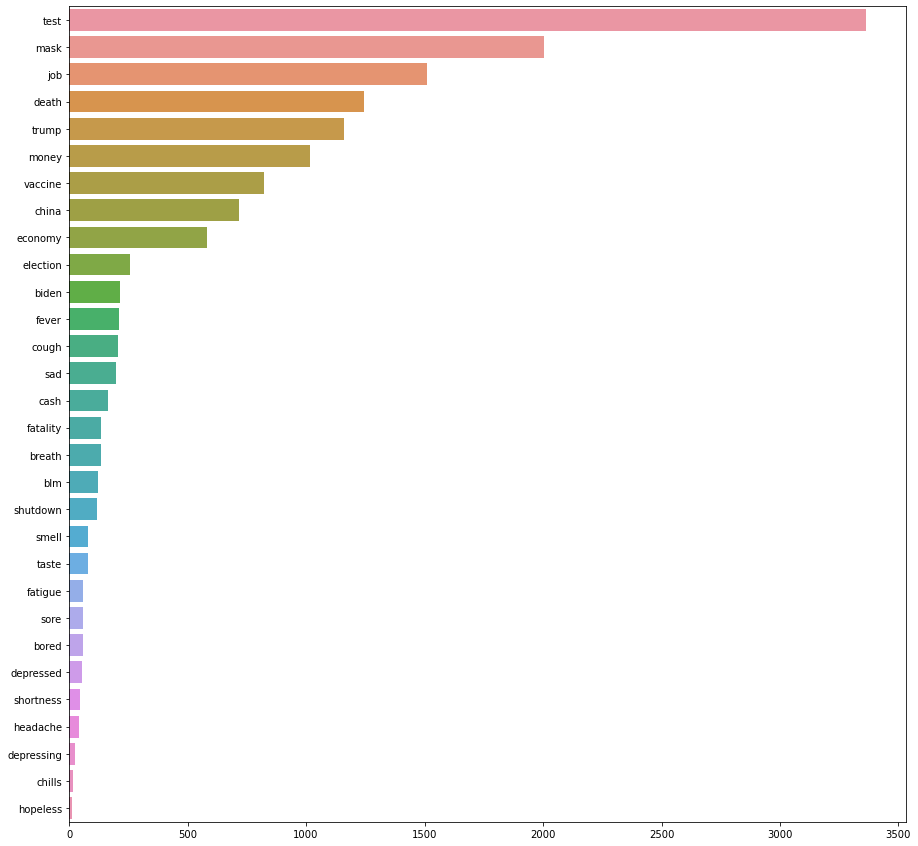

In [28]:
_, ax6 = plt.subplots(figsize=(15, 15))
sub_mean_reddit = mean_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"])
mean_barplot_2 = sns.barplot(y=sub_mean_reddit.index, x=sub_mean_reddit, orient='h', ax=ax6)
sub_labels = mean_barplot_2.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], sub_mean_reddit.index.tolist()))

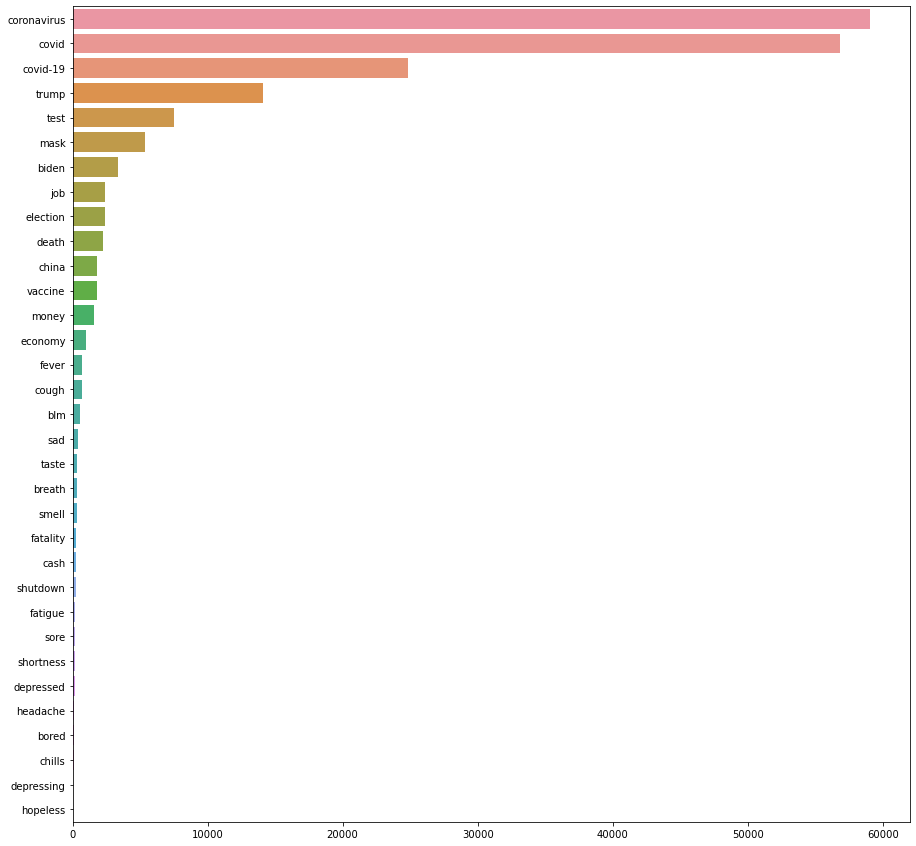

In [29]:
_, ax7 = plt.subplots(figsize=(15, 15))
max_reddit = reddit.set_index('date').max().sort_values(ascending=False)
max_barplot = sns.barplot(y=max_reddit.index, x=max_reddit, orient='h', ax=ax7)
labels = max_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], max_reddit.index.tolist()))

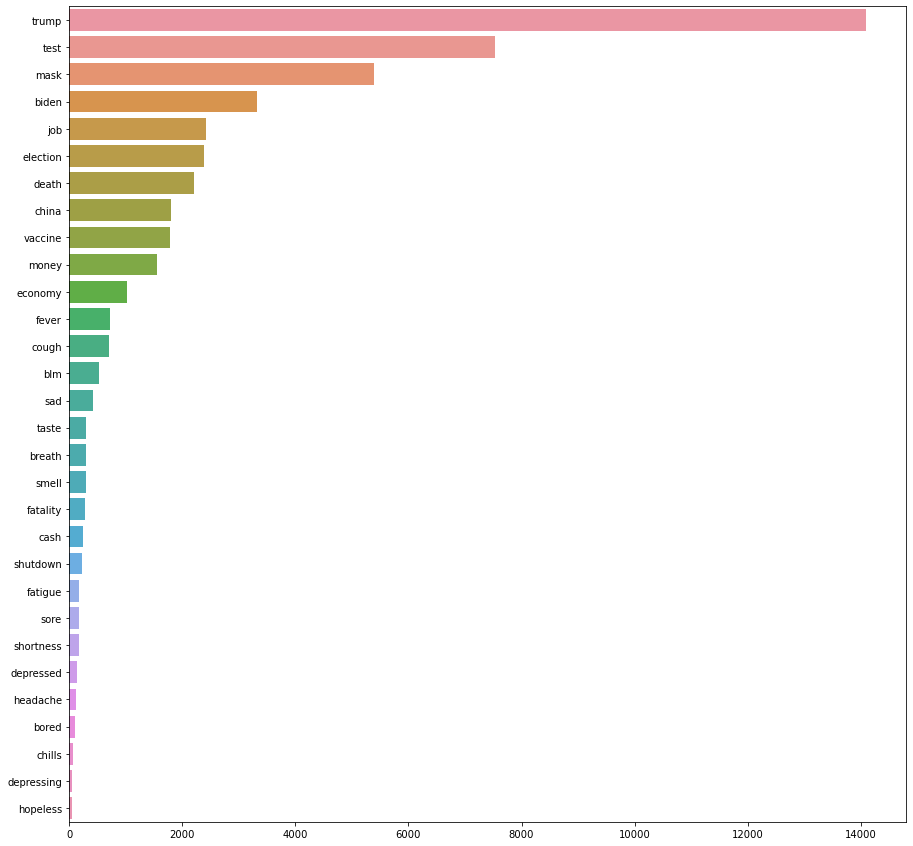

In [32]:
_, ax8 = plt.subplots(figsize=(15, 15))
sub_max_reddit = max_reddit.drop(labels=["covid_count", "covid-19_count", "coronavirus_count"])
sub_max_barplot = sns.barplot(y=sub_max_reddit.index, x=sub_max_reddit, orient='h', ax=ax8)
labels = sub_max_barplot.set_yticklabels(map(lambda x: x.split("_")[1] if len(x.split("_")) == 3 else x.split("_")[0], sub_max_reddit.index.tolist()))

## Questions for reviewers: 

1. What other keywords can we think of, in addition to the existing ones?
2. Should we explore the frequency people talk about a covid-related topic at different times of day?

## Appendix:

Below is our data collection code to convert raw json code to formatted csv files.

```python
import json
import urllib.request
import os

KEYWORDS = [
    'covid',
    'covid-19',
    'coronavirus',
    'covid+economy',
    'covid+job',
    'covid+jobs',
    'covid+cash',
    'covid+money',
    'covid+blm',
    'covid+biden',
    'covid+trump',
    'covid+election',
    'covid+china',
    'covid+mask',
    'covid+masks',
    'covid+shutdown',
    'covid+tests',
    'covid+tested',
    'covid+testing',
    'covid+test',
    'covid+sad',
    'covid+depressed',
    'covid+depressing',
    'covid+hopeless',
    'covid+bored',
    'covid+death',
    'covid+fatality',
    'covid+vaccine',
    'covid+vaccines',
    'covid+breath',
    'covid+chills',
    'covid+cough',
    'covid+fatigue',
    'covid+fever',
    'covid+headache',
    'covid+shortness',
    'covid+smell',
    'covid+sore',
    'covid+taste'
]

BASE_URL = 'http://api.pushshift.io/reddit/search/comment/?q={}&after=300d&aggs=created_utc&frequency=day&size=0&sort=asc'

def get_data(base_url, keyword):
    url = base_url.format(keyword)
    data = urllib.request.urlopen(url).read()
    record = data.decode('UTF-8')
    result = json.loads(record)
    result = result.get('aggs').get('created_utc')

    if '+' in keyword:
        file_to_write = keyword.replace('+', '-')
        col_name = keyword.replace('+', '_')
    else:
        file_to_write, col_name = keyword, keyword

    with open(file_to_write + '.csv', 'w+') as f:
        f.write('date,{}\n'.format(col_name + '_count'))
        for line in result:
            f.write(','.join([str(line.get('key')), str(line.get('doc_count'))]))
            f.write('\n')

for keyword in KEYWORDS:
    get_data(BASE_URL, keyword)
```